In [1]:
!pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import FinanceDataReader as fdr
df = fdr.DataReader('030520', '2003')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2003-01-02,4798,5198,4748,5047,2921570,0.063198
2003-01-03,5148,5398,5098,5147,5477860,0.019814
2003-01-06,5198,5198,4998,5097,1962360,-0.009714
2003-01-07,5248,5248,4948,4947,2133030,-0.029429
2003-01-08,4948,5048,4848,4897,1858070,-0.010107


# 투자전략(자동매매, 백테스팅)

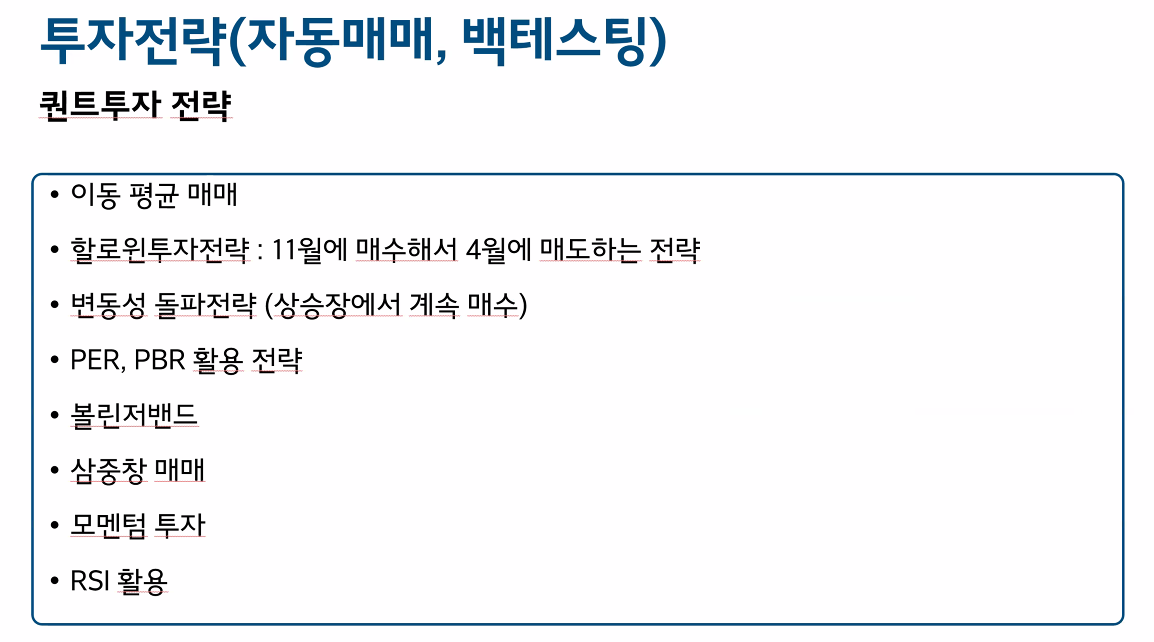

# 이동평균선을 활용한 매매

- 이동평균선 window size가 작은 것 -> 빠르게 움직인다.(빠른선)
- 이동평균선 window size가 큰 것 -> 느리게 움직인다.(느린선)
- 종가 빠른선 -> 느린선을 상향 돌파했다. ->

In [7]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
df = fdr.DataReader('MSFT', '2020')[['Close']]
df.head()

,Close
Date,
2020-01-02,160.619995
2020-01-03,158.619995
2020-01-06,159.029999
2020-01-07,157.580002
2020-01-08,160.089996


In [42]:

fast_window_size = 10
slow_window_size = 30
df['MA_fast'] = df['Close'].rolling(fast_window_size, min_periods = 1).mean()  # min_periods = 1 : 한개만 모여도 이동평균선을 계산하겠다.
df['MA_slow'] = df['Close'].rolling(slow_window_size, min_periods = 1).mean()
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,False,158.619995,None,NaN
2020-01-03,158.619995,159.619995,159.619995,False,159.029999,None,NaN
2020-01-06,159.029999,159.423330,159.423330,False,157.580002,None,NaN
2020-01-07,157.580002,158.962498,158.962498,False,160.089996,None,NaN
2020-01-08,160.089996,159.187997,159.187997,False,162.089996,None,NaN


<AxesSubplot: xlabel='Date'>

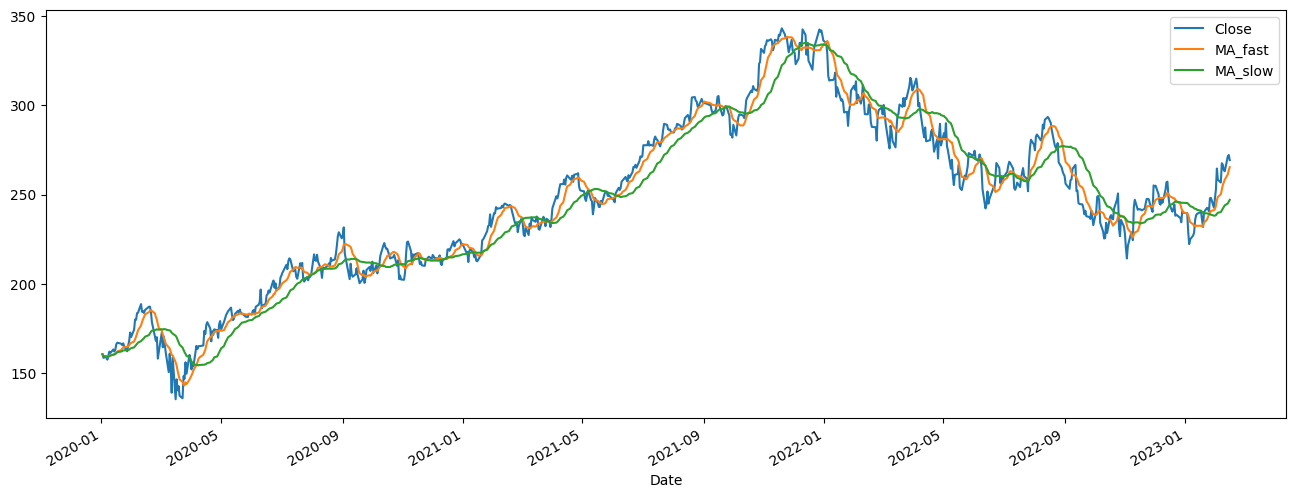

In [19]:
df.plot(figsize = (16, 6))
# 종가 빠른선 이 느린선을 상향 돌파했다 - > 상향추세
# 종가 느린선 이 빠른선을 상향 돌파했다. - > 하향추세  ... 이걸로 매출 매도 타이밍을 보는 것.

In [53]:
df['is_hold'] = np.where(df['MA_fast'] >= df['MA_slow'], True, False) # 빠른선이 더 높아야 올라가는 추세니까 팔겠다

In [54]:
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001


In [55]:
# 매수신호 -> 다음날 매수

In [56]:
df['NextDay_Close'] = df['Close'].shift(-1)
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001


In [57]:
df['NextDay_Close'] - df['Close']  # 당일리턴을 계산하려고하는 것. 2020-01-02

Date
2020-01-02   -2.000000
2020-01-03    0.410004
2020-01-06   -1.449997
2020-01-07    2.509994
2020-01-08    2.000000
                ...   
2023-02-09   -0.519989
2023-02-10    8.220001
2023-02-13    0.850006
2023-02-14   -2.850006
2023-02-15         NaN
Length: 787, dtype: float64

In [58]:
df['return'] = np.where(df['is_hold'] == True, df['NextDay_Close'] -df['Close'], None)
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001


In [59]:
df['cum_return'] = df['return'].cumsum()
df.tail()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005
2023-02-14,272.170013,263.697003,246.086334,True,269.320007,-2.850006,33.779999
2023-02-15,269.320007,265.354004,247.077668,True,NaN,NaN,NaN


In [60]:
df[df['is_hold'] == True]

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001
...,...,...,...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005


## 이동평균 매매 시각화

In [61]:
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001


In [63]:
# 빠른선이 느린선을 상향돌파할떄 : 매수신호
# 빠른선이 느린선을 하향돌파할때 : 매도신호
# 정확한 돌파 시점을 구하는 로직 [10min / 12시 38분까지]

<AxesSubplot: xlabel='Date'>

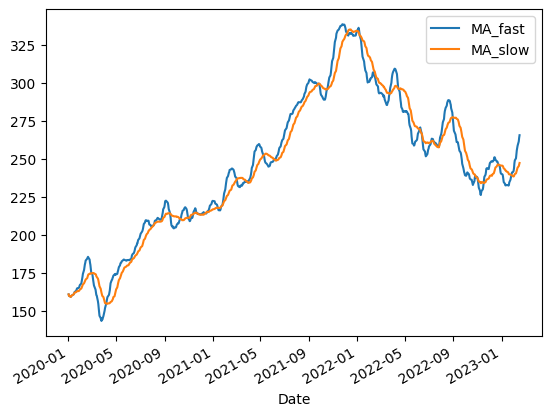

In [69]:
df[['MA_fast', 'MA_slow']].plot()

In [77]:
# 종현이형 답. 
test = df.copy()

test['MA_diff'] = test['MA_fast'] - test['MA_slow']
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff
Date,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0


In [ ]:
np.where(test['MA_diff'] > 0, '')

In [ ]:
signal_date = test[test['MA_diff'] ! -

In [78]:
test['MA_diff']  = test['MA_fast'] - test['MA_slow']
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff
Date,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0


In [79]:
test['Check'] = np.where(test['MA_diff'] > 0, 'pos', 'neg')
test.head()
signal_date = test[test['Check'] != test['Check'].shift(1)].index
signal_date
# signal_date = test[test['Check'] != test['Check'].shift(1)].index
test.loc[signal_date, 'signal'] = True
test.head(5)

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check,signal
Date,,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0,neg,True
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0,neg,NaN
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0,neg,NaN
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0,neg,NaN
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0,neg,NaN


In [84]:
# 알고 있는 정보 : 매수 매도로 신호가 온날 -> 매수, 매도
test['Sell'] = np.where((test['Check'] =='neg') & (test['signal'] == True), True, None)
test['Buy'] = np.where((test['Check'] =='pos') & (test['signal'] == True), True, None)
test['Buy']

Date
2020-01-02    None
2020-01-03    None
2020-01-06    None
2020-01-07    None
2020-01-08    None
              ... 
2023-02-09    None
2023-02-10    None
2023-02-13    None
2023-02-14    None
2023-02-15    None
Name: Buy, Length: 787, dtype: object

In [99]:
Buy_date = test[test['Buy'] == True].index
Sell_date = test[test['Sell'] == True].index
Buy_date

DatetimeIndex(['2020-01-16', '2020-04-07', '2020-10-12', '2020-11-12',
               '2020-11-24', '2020-12-18', '2021-01-22', '2021-03-29',
               '2021-03-31', '2021-06-07', '2021-10-18', '2021-12-31',
               '2022-03-24', '2022-06-08', '2022-07-07', '2022-10-28',
               '2022-11-17', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

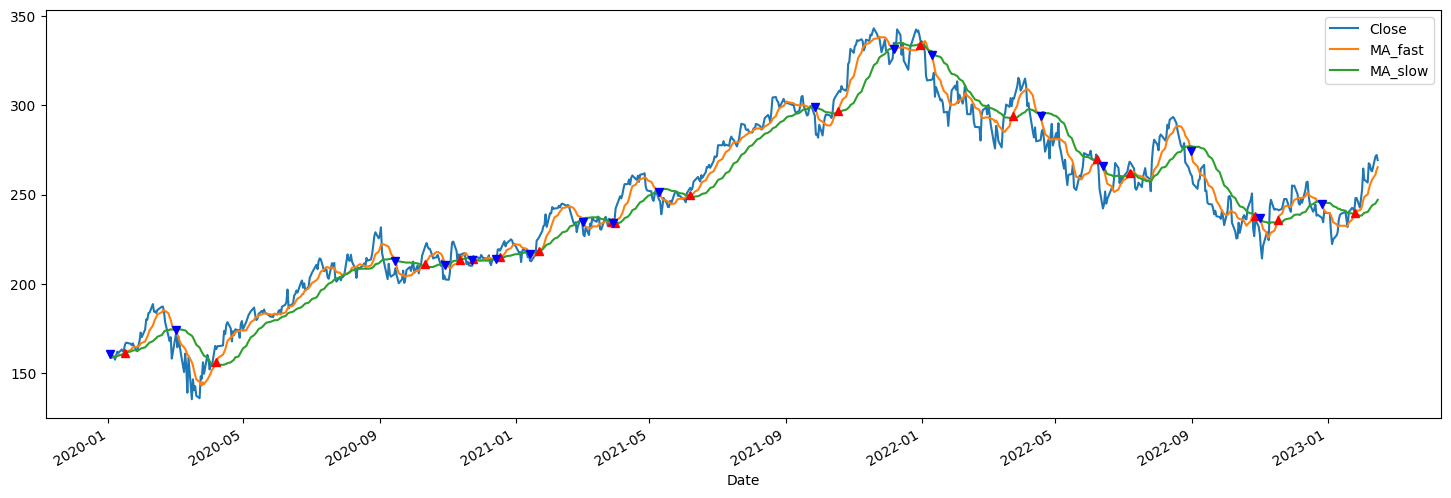

In [104]:
import matplotlib.pyplot as plt
test[['Close', 'MA_fast', 'MA_slow']].plot(figsize = (18,6))

plt.plot(Buy_date, test.loc[Buy_date, 'MA_fast'], 'r^')
plt.plot(Sell_date, test.loc[Sell_date, 'MA_fast'], 'bv')